***STEPS FOR QUERYING STRUCTURAL VARIANT VCF FILE, GETTING THE INTERSECT WITH GOOD PLOTS, AND PLOTTING THE PCA***

Query the Smoove .vcf file for all SV calls with alternate genotypes

In [1]:
#%%bash
#VCF=sparrow_all.smoove.square.vcf.gz

#bcftools query -f '%CHROM\t%POS\t%END\t%ALT[\t%GT]\n' ${VCF} | sort -k1,1 -k2,2n | grep CM | grep -v '\[' | grep -v '\]' | sed 's/<DEL>/DEL/g' | sed 's/<DUP>/DUP/g' | sed 's/<INV>/INV/g' > SV_altgenos.bed

***PART 1. INTERSECT AND PLOT SVs SCORED AS "YES" BY ALL CURATORS***

STEP 1 - filter out only the Good calls in the report:

Filter for number of SVs in report by desired person, reorganize columns for order chrom, start pos,stop pos, SV type:

***Filter for Yes's for each of the four curators***

First set the file names and curator names as variables

Then extract all Yes's from the raw report

In [2]:
%%bash
RAWDEL=raw_report_del_dec26_2020.tsv
#Enter the curators emails below. In the above file they have been replaced with the following:
CUR1=curator1
CUR2=curator2
CUR3=curator3
CUR4=curator4
#set the SV class
SV=DEL

#Extract all Yes's
cat ${RAWDEL} | grep "${CUR1}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR1}.tsv
cat ${RAWDEL} | grep "${CUR2}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR2}.tsv
cat ${RAWDEL} | grep "${CUR3}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR3}.tsv
cat ${RAWDEL} | grep "${CUR4}" | grep "Yes"| sed '1,3d' > yes_${SV}_${CUR4}.tsv

Process the .bed file to extract genotype information for each SV call

In [3]:
%%bash
#set the SV class
SV=DEL
CUR1=curator1
CUR2=curator2
CUR3=curator3
CUR4=curator4

cat yes_${SV}_${CUR1}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR1}_processed.bed 
cat yes_${SV}_${CUR2}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR2}_processed.bed 
cat yes_${SV}_${CUR3}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR3}_processed.bed 
cat yes_${SV}_${CUR4}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yes_${SV}_${CUR4}_processed.bed 

First take intersect off all four curators' validated SVs

In [4]:
%%bash 
#set the SV class
SV=DEL
CUR1=curator1
CUR2=curator2
CUR3=curator3
CUR4=curator4

bedops --intersect yes_${SV}_${CUR1}_processed.bed yes_${SV}_${CUR2}_processed.bed yes_${SV}_${CUR3}_processed.bed yes_${SV}_${CUR4}_processed.bed  > yesallintersect.bed

Now intersect with .bed file extracted from original Smoove .vcf file

In [5]:
#%%bash 
#set the SV class
#SV=DEL
#CUR1=curator1
#CUR2=curator2
#CUR3=curator3
#CUR4=curator4

#bedtools intersect -f 0.9 -r -a SV_altgenos.bed -b yesallintersect.bed  > yesallintersect.txt

***Change format of intersected bedfile, repeat this to join 3 first columns with tabs***

In [6]:
cat yesallintersect.txt | sed 's/0\/0/0/g' | sed 's/0\/1/1/g' | sed 's/1\/1/2/g'| sed 's/.\/\./0/g' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' > yesallintersect_edit.txt 

***Convert to .csv for export to Python, to tranpose matrix***

In [7]:
cat yesallintersect_edit.txt | sed 's/\t/,/'g > yesallintersect_edit.csv

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv("yesallintersect_edit.csv", header = None, index_col = None)

df_T = df.transpose()

df_T.to_csv("yesallintersect_T.csv", index = False)

Remove first line

In [9]:
%%bash
sed -i -e 1,1d yesallintersect_T.csv 

***Now plot in Python!***

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("yesallintersect_T.csv")
hs = pd.read_csv("HS.sample.csv")
df

,CM004525.1_450632_450686_DEL,CM004525.1_2793450_2793535_DEL,CM004525.1_3367262_3367328_DEL,CM004525.1_5558809_5559097_DEL,CM004525.1_7403900_7405237_DEL,CM004525.1_7522591_7522670_DEL,CM004525.1_9075437_9075557_DEL,CM004525.1_9813191_9813303_DEL,CM004525.1_10956079_10956149_DEL,CM004525.1_11653151_11653211_DEL,...,CM004549.1_2440750_2440870_DEL,CM004550.1_246509_247134_DEL,CM004550.1_1236277_1236348_DEL,CM004550.1_1890650_1890710_DEL,CM004550.1_3727001_3727053_DEL,CM004550.1_4313941_4314149_DEL,CM004552.1_1630829_1630907_DEL,CM004553.1_2614567_2614634_DEL,CM004553.1_2844948_2845034_DEL,CM004554.1_868673_869052_DEL
0,0,2,2,2,1,1,0,2,0,1,...,2,1,1,0,0,1,1,0,0,1
1,0,1,0,0,1,2,1,1,0,2,...,1,2,0,0,0,1,0,2,0,0
2,0,0,0,1,1,2,0,1,1,2,...,0,0,0,0,1,2,0,2,0,0
3,1,0,0,0,1,0,0,0,0,2,...,2,0,0,0,2,1,0,2,0,0
4,0,1,2,1,0,0,0,0,1,1,...,0,0,0,0,1,2,1,0,1,1
5,2,0,2,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,2,2
6,0,0,2,1,0,0,0,1,0,2,...,0,0,0,0,0,0,0,2,0,1
7,1,0,1,1,1,2,1,1,0,0,...,1,0,0,0,0,2,1,2,2,0
8,0,1,2,1,1,2,1,0,1,0,...,2,1,1,0,0,2,0,2,0,1
9,2,2,0,1,0,0,0,2,0,1,...,0,2,0,1,2,0,0,0,2,0


In [12]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df


In [13]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

components 

array([[-2.29321614, -1.0686168 ],
       [-2.80739552, -0.05064621],
       [ 0.29929478,  1.59869973],
       [-1.08061363,  1.39092992],
       [-0.14903699, -2.82404473],
       [-2.59111261, -5.04806587],
       [-2.02494172, -0.42379293],
       [-6.68648576, 14.22920414],
       [-7.61665918, 14.68846853],
       [-3.62479127, -1.93538665],
       [-3.69913197, -2.47067328],
       [16.98275167,  5.99493935],
       [ 0.40924062, -1.55254721],
       [ 2.33900622, -5.45767814],
       [13.11902958,  0.71020492],
       [-2.23424157, -3.69264386],
       [-1.20657433, -1.83417195],
       [-4.59874766, -2.99207114],
       [-2.44811857, -2.82325994],
       [ 1.92133999, -5.54281349],
       [11.78420517,  2.87335513],
       [-0.76577828, -7.43647598],
       [ 0.29596233, -8.74504221],
       [ 0.75708218, -6.37603585],
       [-4.29572706, -5.99616495],
       [-2.14168713, -6.99567652],
       [19.04271929,  5.81207047],
       [-3.41046837,  0.64991811],
       [ 9.54474798,

In [14]:
pcomp = pd.DataFrame(components)

merged = pd.concat([pcomp, hs], axis=1)

merged['popinfo']
PC1 = merged.iloc[:, 0]
PC2 = merged.iloc[:, 1]

merged_n = merged.rename(columns={0: 'PC1'})
merged_new = merged_n.rename(columns={1: 'PC2'})

merged2 =  merged_new.rename(columns={'popinfo': 'populations'})

In [15]:
merged2

,PC1,PC2,populations
0,-2.293216,-1.068617,ALTA
1,-2.807396,-0.050646,ALTA
2,0.299295,1.598700,HELG
3,-1.080614,1.390930,TRON
4,-0.149037,-2.824045,TRON
5,-2.591113,-5.048066,TRON
6,-2.024942,-0.423793,HELG
7,-6.686486,14.229204,PASV
8,-7.616659,14.688469,PASV
9,-3.624791,-1.935387,TRON


In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

	
# Set theme
sns.set_style('darkgrid')

colours = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#EE99AC',  # Fairy
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
	

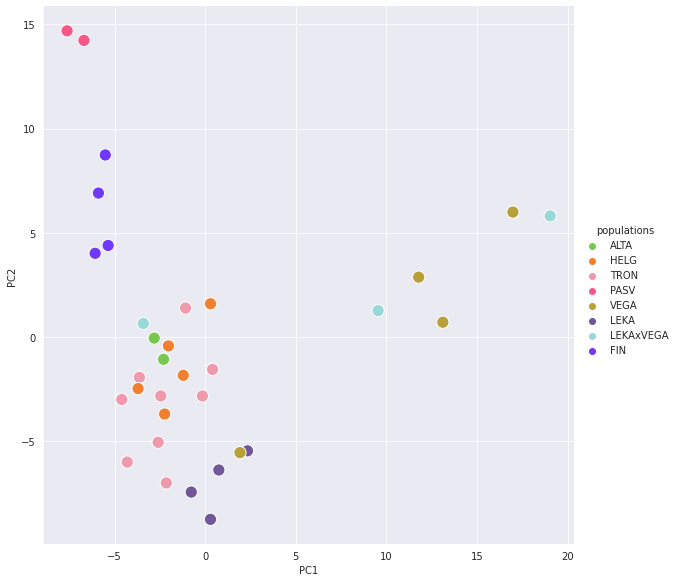

In [17]:
from matplotlib import pyplot
import seaborn


sns.relplot(x="PC1", y="PC2", data=merged2, hue="populations", palette=colours, s=(150),height=8, aspect=1)

***PART 2. INTERSECT AND PLOT SVs SCORED AS "YES" OR "MAYBE" BY ALL CURATORS***

STEP 1 - filter out only the Good calls in the report:

Filter for number of SVs in report by desired person, reorganize columns for order chrom, start pos,stop pos, SV type:

***Filter for Maybes for each of the four curators***

First set the file names and curator names as variables

Then extract all Maybes from the raw report

In [134]:
%%bash
RAWDEL=raw_report_del_dec26_2020.tsv
#Enter the curators emails below. In the above file they have been replaced with the following:
CUR1=curator1
CUR2=curator2
CUR3=curator3
CUR4=curator4
#set the SV class
SV=DEL

#Extract all Yes's
cat ${RAWDEL} | grep "${CUR1}" | grep "Maybe"| sed '1,3d' > maybe_${SV}_${CUR1}.tsv
cat ${RAWDEL} | grep "${CUR2}" | grep "Maybe"| sed '1,3d' > maybe_${SV}_${CUR2}.tsv
cat ${RAWDEL} | grep "${CUR3}" | grep "Maybe"| sed '1,3d' > maybe_${SV}_${CUR3}.tsv
cat ${RAWDEL} | grep "${CUR4}" | grep "Maybe"| sed '1,3d' > maybe_${SV}_${CUR4}.tsv

In [135]:
%%bash
#set the SV class
SV=DEL
CUR1=curator1
CUR2=curator2
CUR3=curator3
CUR4=curator4

cat maybe_${SV}_${CUR1}.tsv yes_${SV}_${CUR1}.tsv >>  yesmaybe_${SV}_${CUR1}.tsv
cat maybe_${SV}_${CUR2}.tsv yes_${SV}_${CUR2}.tsv >>  yesmaybe_${SV}_${CUR2}.tsv
cat maybe_${SV}_${CUR3}.tsv yes_${SV}_${CUR3}.tsv >>  yesmaybe_${SV}_${CUR3}.tsv
cat maybe_${SV}_${CUR4}.tsv yes_${SV}_${CUR4}.tsv >>  yesmaybe_${SV}_${CUR4}.tsv


Process the .bed file to extract genotype information for each SV call

In [136]:
%%bash
#set the SV class
SV=DEL
CUR1=curator1
CUR2=curator2
CUR3=curator3
CUR4=curator4

cat yesmaybe_${SV}_${CUR1}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yesmaybe_${SV}_${CUR1}_processed.bed 
cat yesmaybe_${SV}_${CUR2}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yesmaybe_${SV}_${CUR2}_processed.bed 
cat yesmaybe_${SV}_${CUR3}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yesmaybe_${SV}_${CUR3}_processed.bed 
cat yesmaybe_${SV}_${CUR4}.tsv | sed 's/_/\t/g' | sed 's/ //'g | awk '{ print $4,$5,$6,$3}' | sed 's/DEL\///g' | sort -k1,1 -k2,2n | sed 's/ /\t/'g > yesmaybe_${SV}_${CUR4}_processed.bed 

First take intersect off all four curators' validated SVs

In [137]:
%%bash 
#set the SV class
SV=DEL
CUR1=curator1
CUR2=curator2
CUR3=curator3
CUR4=curator4

bedops --intersect yesmaybe_${SV}_${CUR1}_processed.bed yesmaybe_${SV}_${CUR2}_processed.bed yesmaybe_${SV}_${CUR3}_processed.bed yes_${SV}_${CUR4}_processed.bed  > yesmaybeallintersect.bed

Now intersect with .bed file extracted from original Smoove .vcf file

In [138]:
#%%bash 
#set the SV class
#SV=DEL
#CUR1=curator1
#CUR2=curator2
#CUR3=curator3
#CUR4=curator4

#bedtools intersect -f 0.9 -r -a SV_altgenos.bed -b yesmaybeallintersect.bed  > yesmaybeallintersect.txt

***Change format of intersected bedfile, repeat this to join 3 first columns with tabs***

In [139]:
cat yesmaybeallintersect.txt | sed 's/0\/0/0/g' | sed 's/0\/1/1/g' | sed 's/1\/1/2/g'| sed 's/.\/\./0/g' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' > yesmaybeallintersect_edit.txt 

***Convert to .csv for export to Python, to tranpose matrix***

In [140]:
cat yesmaybeallintersect_edit.txt | sed 's/\t/,/'g > yesmaybeallintersect_edit.csv

In [141]:
import numpy as np
import pandas as pd

df = pd.read_csv("yesmaybeallintersect_edit.csv", header = None, index_col = None)

df_T = df.transpose()

df_T.to_csv("yesmaybeallintersect_T.csv", index = False)

Remove first line

In [142]:
%%bash
sed -i -e 1,1d yesmaybeallintersect_T.csv 

***Now plot in Python!***

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [144]:
df = pd.read_csv("yesmaybeallintersect_T.csv")
hs = pd.read_csv("HS.sample.csv")
df

,CM004525.1_450632_450686_DEL,CM004525.1_2793450_2793535_DEL,CM004525.1_3367262_3367328_DEL,CM004525.1_5558809_5559097_DEL,CM004525.1_7403900_7405237_DEL,CM004525.1_7522591_7522670_DEL,CM004525.1_9075437_9075557_DEL,CM004525.1_9813191_9813303_DEL,CM004525.1_10956079_10956149_DEL,CM004525.1_11653151_11653211_DEL,...,CM004549.1_2440750_2440870_DEL,CM004550.1_246509_247134_DEL,CM004550.1_1236277_1236348_DEL,CM004550.1_1890650_1890710_DEL,CM004550.1_3727001_3727053_DEL,CM004550.1_4313941_4314149_DEL,CM004552.1_1630829_1630907_DEL,CM004553.1_2614567_2614634_DEL,CM004553.1_2844948_2845034_DEL,CM004554.1_868673_869052_DEL
0,0,2,2,2,1,1,0,2,0,1,...,2,1,1,0,0,1,1,0,0,1
1,0,1,0,0,1,2,1,1,0,2,...,1,2,0,0,0,1,0,2,0,0
2,0,0,0,1,1,2,0,1,1,2,...,0,0,0,0,1,2,0,2,0,0
3,1,0,0,0,1,0,0,0,0,2,...,2,0,0,0,2,1,0,2,0,0
4,0,1,2,1,0,0,0,0,1,1,...,0,0,0,0,1,2,1,0,1,1
5,2,0,2,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,2,2
6,0,0,2,1,0,0,0,1,0,2,...,0,0,0,0,0,0,0,2,0,1
7,1,0,1,1,1,2,1,1,0,0,...,1,0,0,0,0,2,1,2,2,0
8,0,1,2,1,1,2,1,0,1,0,...,2,1,1,0,0,2,0,2,0,1
9,2,2,0,1,0,0,0,2,0,1,...,0,2,0,1,2,0,0,0,2,0


In [145]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df


In [146]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

components 

array([[-2.43057706, -0.85206785],
       [-2.53983998, -0.1755559 ],
       [ 0.50886807,  1.3215813 ],
       [-1.27446712,  1.01534095],
       [ 0.12493433, -3.03522917],
       [-2.6893275 , -5.1146047 ],
       [-2.31654033, -1.11138674],
       [-7.27344076, 14.21863784],
       [-8.40658731, 14.74234252],
       [-3.41502137, -2.98497014],
       [-3.73431948, -3.19146762],
       [16.8713241 ,  5.76931321],
       [ 0.11890301, -0.62767068],
       [ 2.25901616, -4.9181681 ],
       [13.43757043,  1.75724927],
       [-2.579298  , -2.08008049],
       [-1.13515408, -0.56332255],
       [-4.46918269, -3.85592563],
       [-2.18210443, -3.69898173],
       [ 2.37226415, -6.44962823],
       [11.6226636 ,  2.73223377],
       [-0.42542223, -6.90532449],
       [ 0.59987239, -8.91576996],
       [ 0.7234166 , -6.50759026],
       [-4.27808846, -6.08076834],
       [-2.02052646, -7.01623203],
       [19.17114307,  6.64145296],
       [-3.55235361,  0.34020335],
       [ 9.64257519,

In [147]:
pcomp = pd.DataFrame(components)

merged = pd.concat([pcomp, hs], axis=1)

merged['popinfo']
PC1 = merged.iloc[:, 0]
PC2 = merged.iloc[:, 1]

merged_n = merged.rename(columns={0: 'PC1'})
merged_new = merged_n.rename(columns={1: 'PC2'})

merged2 =  merged_new.rename(columns={'popinfo': 'populations'})

In [148]:
merged2

,PC1,PC2,populations
0,-2.430577,-0.852068,ALTA
1,-2.539840,-0.175556,ALTA
2,0.508868,1.321581,HELG
3,-1.274467,1.015341,TRON
4,0.124934,-3.035229,TRON
5,-2.689328,-5.114605,TRON
6,-2.316540,-1.111387,HELG
7,-7.273441,14.218638,PASV
8,-8.406587,14.742343,PASV
9,-3.415021,-2.984970,TRON


In [149]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

	
# Set theme
sns.set_style('darkgrid')

colours = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#EE99AC',  # Fairy
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
	

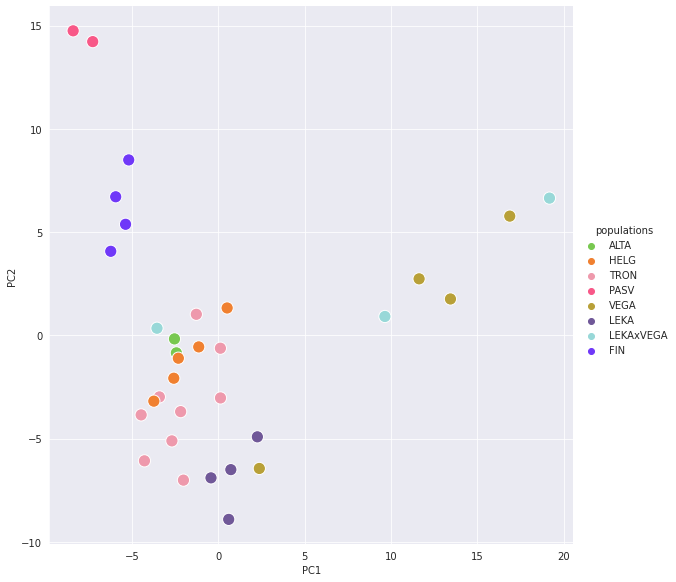

In [150]:
from matplotlib import pyplot
import seaborn


sns.relplot(x="PC1", y="PC2", data=merged2, hue="populations", palette=colours, s=(150),height=8, aspect=1)

***PART 3. PLOT SVs REJECTED BY ALL CURATORS, THE REMAINDER OF THE ABOVE INTERSECT FOR SCORES OF "YES" OR "MAYBE"***

In [177]:
#%%bash 
#grep the SV class

#bedtools intersect -v -a SV_altgenos.bed -b yesallintersect.bed | grep "DEL" > all_rejected.txt

***Change format of intersected bedfile, repeat this to join 3 first columns with tabs***

In [152]:
cat all_rejected.txt | sed 's/0\/0/0/g' | sed 's/0\/1/1/g' | sed 's/1\/1/2/g'| sed 's/.\/\./0/g' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' > all_rejected_edit.txt 

***Convert to .csv for export to Python, to tranpose matrix***

In [153]:
cat all_rejected_edit.txt | sed 's/\t/,/'g > all_rejected_edit.csv

In [154]:
import numpy as np
import pandas as pd

df = pd.read_csv("all_rejected_edit.csv", header = None, index_col = None)
df
df_T = df.transpose()

df_T.to_csv("all_rejected_T.csv", index = False)

Remove first line

In [155]:
%%bash
sed -i -e 1,1d all_rejected_T.csv 

***Now plot in Python!***

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [157]:
df = pd.read_csv("all_rejected_T.csv")
hs = pd.read_csv("HS.sample.csv")
df

,CM004525.1_69685_70178_DEL,CM004525.1_70489_413631_DEL,CM004525.1_83292_83620_DEL,CM004525.1_83758_84400_DEL,CM004525.1_84072_84367_DEL,CM004525.1_110201_425053_DEL,CM004525.1_116388_118179_DEL,CM004525.1_142504_144352_DEL,CM004525.1_152957_153556_DEL,CM004525.1_192298_192672_DEL,...,CM004554.1_3266132_3266820_DEL,CM004554.1_3272734_3274222_DEL,CM004554.1_3272735_3274901_DEL,CM004554.1_3285689_3286800_DEL,CM004554.1_3293614_3294606_DEL,CM004554.1_3378163_3378562_DEL,CM004554.1_3458698_3461289_DEL,CM004554.1_3461380_3466508_DEL,CM004554.1_3479906_3486030_DEL,CM004554.1_3514583_3515112_DEL
0,0,0,1,1,2,0,0,0,2,0,...,0,1,1,0,0,0,1,0,2,2
1,0,1,1,1,2,1,2,0,2,0,...,2,2,0,0,0,2,2,0,2,2
2,0,1,1,1,1,1,2,1,2,0,...,2,1,0,1,0,2,2,0,2,2
3,1,0,1,0,1,1,0,0,2,0,...,2,1,0,1,0,2,1,2,2,2
4,0,2,1,0,1,1,2,0,2,0,...,0,2,2,0,0,0,0,0,2,2
5,0,1,2,1,1,0,2,0,2,0,...,2,1,0,0,0,0,1,2,2,2
6,0,1,1,0,2,1,1,0,2,0,...,2,0,1,0,0,0,1,0,2,2
7,0,1,2,1,2,1,0,0,2,1,...,2,2,0,0,0,0,1,0,2,2
8,0,1,1,1,1,1,0,0,2,0,...,2,2,1,0,0,2,1,1,2,2
9,1,1,2,1,1,1,2,0,2,2,...,2,1,0,0,1,0,1,1,2,2


In [158]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df


In [159]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

components 

array([[ -5.64851414,  -2.10357183],
       [  7.59257391,   9.35544119],
       [ -8.45319533,  -5.56732117],
       [  0.18307364,   6.38992641],
       [-12.46771846, -14.02656617],
       [  1.50378375,  12.7438843 ],
       [-19.96539583, -25.14158337],
       [-17.61881032,  11.64963536],
       [ -6.27808581,  25.5382282 ],
       [ -1.14302179,   4.40401731],
       [-19.76294736, -17.72033644],
       [ 26.15376027,  -5.31120463],
       [ -6.63023738, -10.38657514],
       [  4.67116074,  -3.30104382],
       [ 26.01045054, -12.87188616],
       [ -8.46631339, -14.45291766],
       [ -2.21332919,   1.00479701],
       [ -7.83205452,  -5.28914919],
       [ -8.13897069,  -5.2666486 ],
       [  0.53151832,  -6.74075771],
       [ 23.41086122,  -2.39344653],
       [  4.68980642,   5.91766271],
       [ -5.62832409, -11.65559407],
       [  2.23499981,   1.14159892],
       [ -1.39314247,   0.89596383],
       [  3.76410752,   2.96537856],
       [ 32.71759108, -14.21507067],
 

In [160]:
pcomp = pd.DataFrame(components)

merged = pd.concat([pcomp, hs], axis=1)

merged['popinfo']
PC1 = merged.iloc[:, 0]
PC2 = merged.iloc[:, 1]

merged_n = merged.rename(columns={0: 'PC1'})
merged_new = merged_n.rename(columns={1: 'PC2'})

merged2 =  merged_new.rename(columns={'popinfo': 'populations'})

In [161]:
merged2

,PC1,PC2,populations
0,-5.648514,-2.103572,ALTA
1,7.592574,9.355441,ALTA
2,-8.453195,-5.567321,HELG
3,0.183074,6.389926,TRON
4,-12.467718,-14.026566,TRON
5,1.503784,12.743884,TRON
6,-19.965396,-25.141583,HELG
7,-17.618810,11.649635,PASV
8,-6.278086,25.538228,PASV
9,-1.143022,4.404017,TRON


In [162]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

	
# Set theme
sns.set_style('darkgrid')

colours = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#EE99AC',  # Fairy
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
	

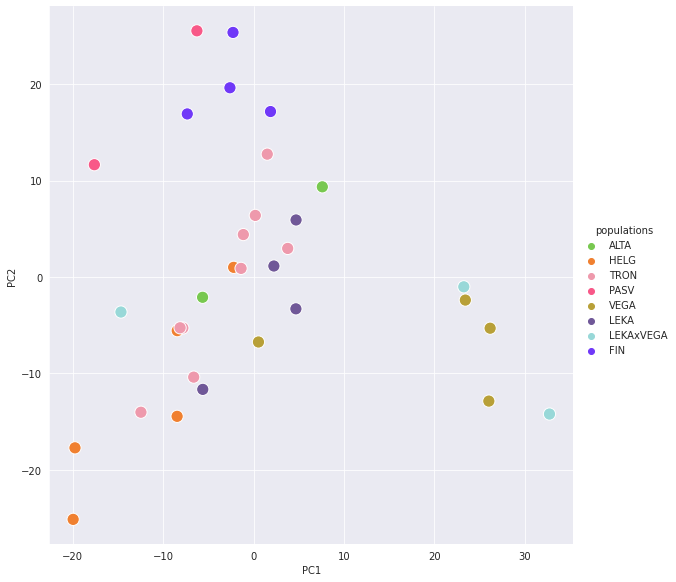

In [163]:
from matplotlib import pyplot
import seaborn


sns.relplot(x="PC1", y="PC2", data=merged2, hue="populations", palette=colours, s=(150),height=8, aspect=1)

***PART 4. PLOT ALL UNCURATED SVs***

In [178]:
#%%bash 
#set the SV class
#SV=DEL

#cat SV_altgenos.bed | grep "${SV}" > alluncurated.txt

In [179]:
cat alluncurated.txt | sed 's/0\/0/0/g' | sed 's/0\/1/1/g' | sed 's/1\/1/2/g'| sed 's/.\/\./0/g' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' | sed -e 's/[\t ]\+/_/' > alluncurated_edit.txt 

***Convert to .csv for export to Python, to tranpose matrix***

In [180]:
cat alluncurated_edit.txt  | sed 's/\t/,/'g > alluncurated_edit.csv

In [181]:
import numpy as np
import pandas as pd

df = pd.read_csv("alluncurated_edit.csv", header = None, index_col = None)
df
df_T = df.transpose()

df_T.to_csv("alluncurated_T.csv", index = False)

Remove first line

In [182]:
%%bash
sed -i -e 1,1d alluncurated_T.csv 

***Now plot in Python!***

In [183]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [184]:
df = pd.read_csv("alluncurated_T.csv")
hs = pd.read_csv("HS.sample.csv")
df

,CM004525.1_69685_70178_DEL,CM004525.1_70489_413631_DEL,CM004525.1_83292_83620_DEL,CM004525.1_83758_84400_DEL,CM004525.1_84072_84367_DEL,CM004525.1_110201_425053_DEL,CM004525.1_116388_118179_DEL,CM004525.1_142504_144352_DEL,CM004525.1_152957_153556_DEL,CM004525.1_192298_192672_DEL,...,CM004554.1_3266132_3266820_DEL,CM004554.1_3272734_3274222_DEL,CM004554.1_3272735_3274901_DEL,CM004554.1_3285689_3286800_DEL,CM004554.1_3293614_3294606_DEL,CM004554.1_3378163_3378562_DEL,CM004554.1_3458698_3461289_DEL,CM004554.1_3461380_3466508_DEL,CM004554.1_3479906_3486030_DEL,CM004554.1_3514583_3515112_DEL
0,0,0,1,1,2,0,0,0,2,0,...,0,1,1,0,0,0,1,0,2,2
1,0,1,1,1,2,1,2,0,2,0,...,2,2,0,0,0,2,2,0,2,2
2,0,1,1,1,1,1,2,1,2,0,...,2,1,0,1,0,2,2,0,2,2
3,1,0,1,0,1,1,0,0,2,0,...,2,1,0,1,0,2,1,2,2,2
4,0,2,1,0,1,1,2,0,2,0,...,0,2,2,0,0,0,0,0,2,2
5,0,1,2,1,1,0,2,0,2,0,...,2,1,0,0,0,0,1,2,2,2
6,0,1,1,0,2,1,1,0,2,0,...,2,0,1,0,0,0,1,0,2,2
7,0,1,2,1,2,1,0,0,2,1,...,2,2,0,0,0,0,1,0,2,2
8,0,1,1,1,1,1,0,0,2,0,...,2,2,1,0,0,2,1,1,2,2
9,1,1,2,1,1,1,2,0,2,2,...,2,1,0,0,1,0,1,1,2,2


In [185]:
import plotly.express as px
from sklearn.decomposition import PCA

X = df


In [186]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

components 

array([[ -4.99113414,  -2.08109144],
       [  2.66682116,   5.17490156],
       [ -5.72486344,  -8.81518307],
       [ -2.2867995 ,   3.18430283],
       [ -8.53108822, -13.60433439],
       [ -1.97486321,   8.65130207],
       [-13.02651829, -24.00456298],
       [-18.80341021,  13.66720841],
       [-13.48861583,  29.90787775],
       [ -2.33641664,   7.140431  ],
       [-16.56067827, -21.94925576],
       [ 33.32626501,   2.97453905],
       [ -3.69451973, -11.87993553],
       [  5.23072471,  -6.34745614],
       [ 31.07768568,  -7.80313815],
       [ -7.52194491, -20.40707973],
       [ -2.47128776,  -1.71749122],
       [ -8.38091179,  -3.2784698 ],
       [ -8.49863712,  -7.91345611],
       [  2.12648635, -11.75894833],
       [ 26.44503269,   7.04585498],
       [  1.40820639,   3.44176659],
       [ -2.66493381, -16.40291678],
       [  1.96840103,  -0.15674034],
       [ -3.661055  ,  -4.11746143],
       [  0.63100419,   0.23089374],
       [ 41.11703983,  -4.25076215],
 

In [187]:
pcomp = pd.DataFrame(components)

merged = pd.concat([pcomp, hs], axis=1)

merged['popinfo']
PC1 = merged.iloc[:, 0]
PC2 = merged.iloc[:, 1]

merged_n = merged.rename(columns={0: 'PC1'})
merged_new = merged_n.rename(columns={1: 'PC2'})

merged2 =  merged_new.rename(columns={'popinfo': 'populations'})

In [188]:
merged2

,PC1,PC2,populations
0,-4.991134,-2.081091,ALTA
1,2.666821,5.174902,ALTA
2,-5.724863,-8.815183,HELG
3,-2.286799,3.184303,TRON
4,-8.531088,-13.604334,TRON
5,-1.974863,8.651302,TRON
6,-13.026518,-24.004563,HELG
7,-18.803410,13.667208,PASV
8,-13.488616,29.907878,PASV
9,-2.336417,7.140431,TRON


In [189]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

	
# Set theme
sns.set_style('darkgrid')

colours = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#EE99AC',  # Fairy
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
	

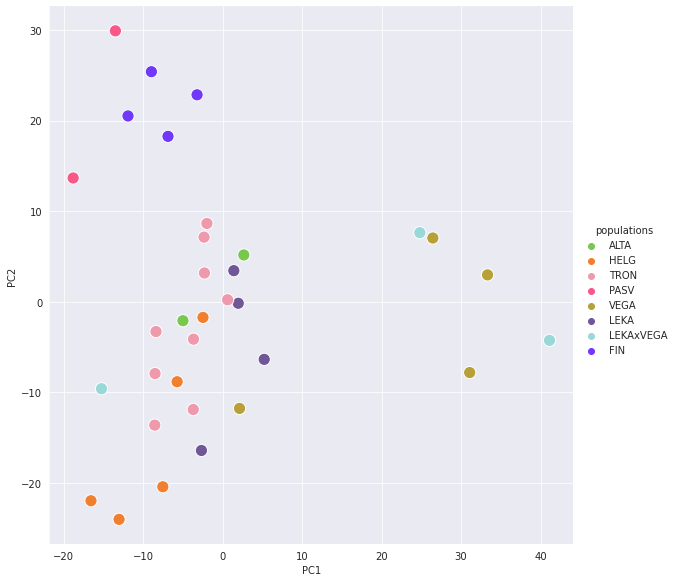

In [190]:
from matplotlib import pyplot
import seaborn


sns.relplot(x="PC1", y="PC2", data=merged2, hue="populations", palette=colours, s=(150),height=8, aspect=1)